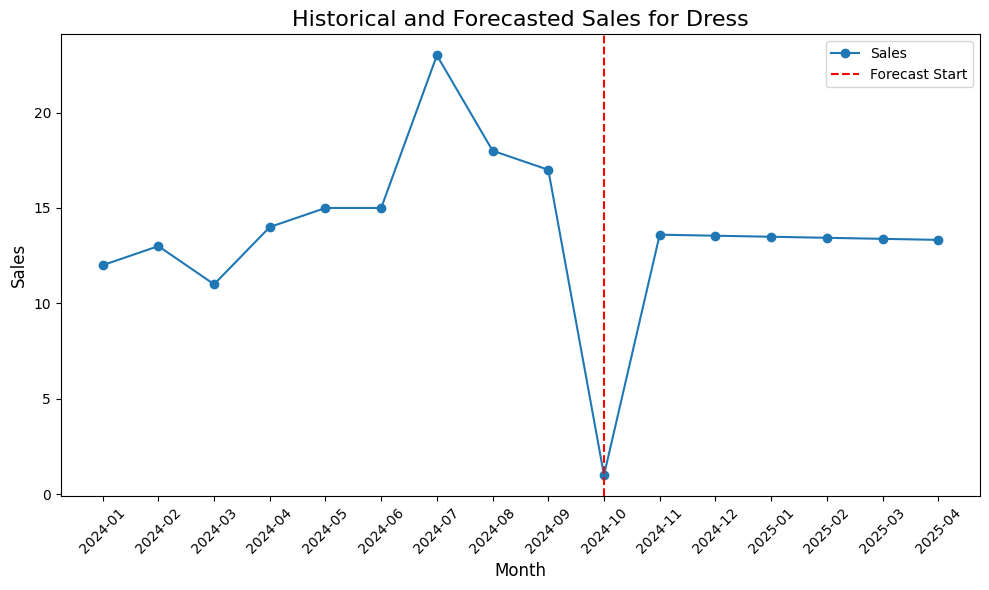

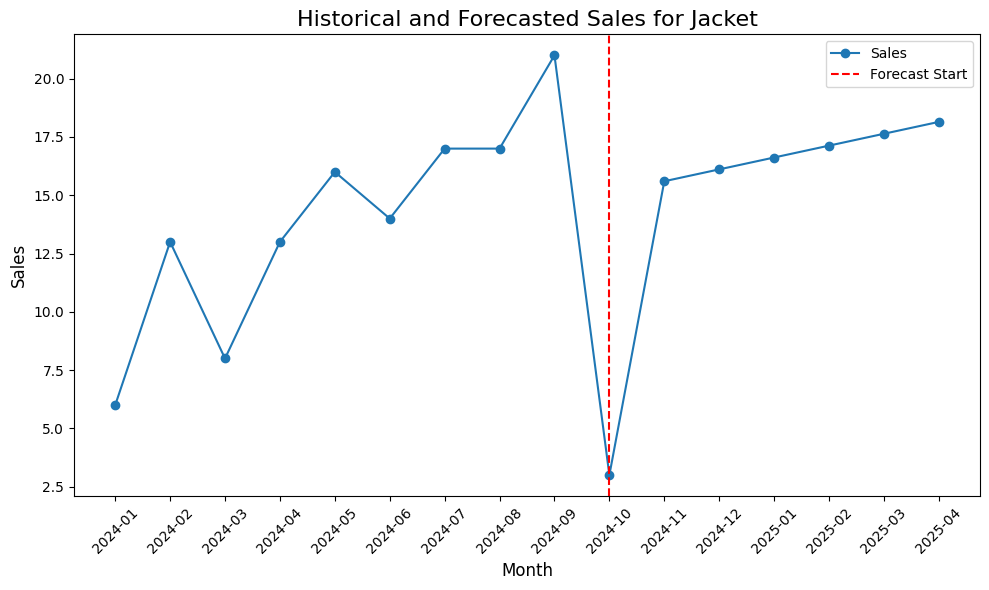

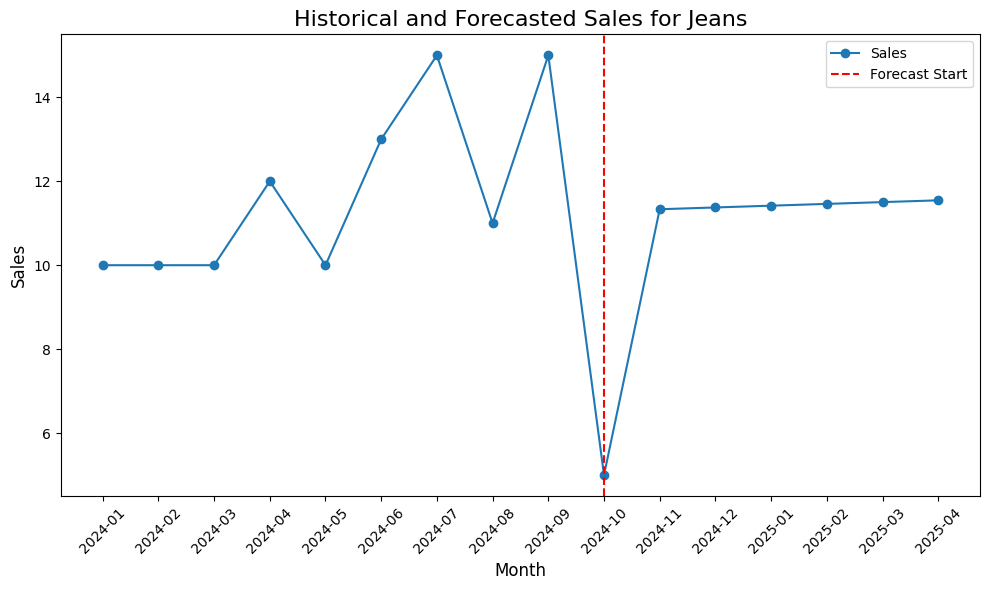

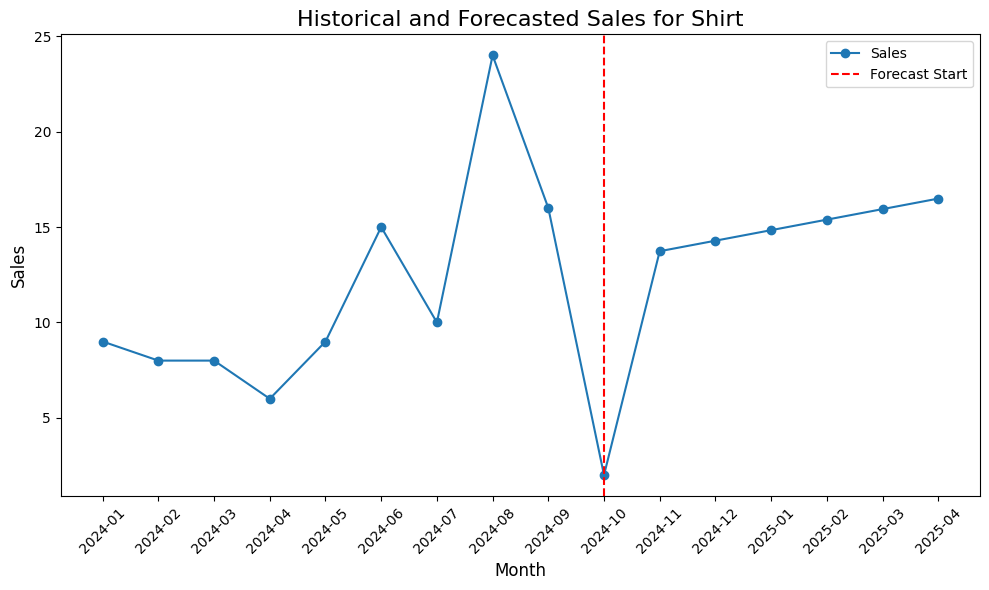

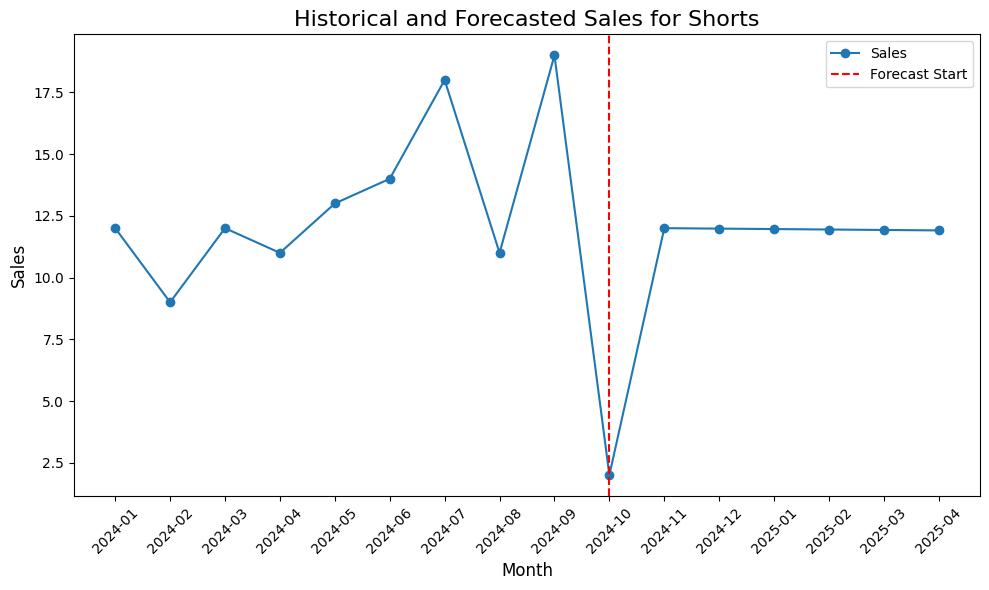

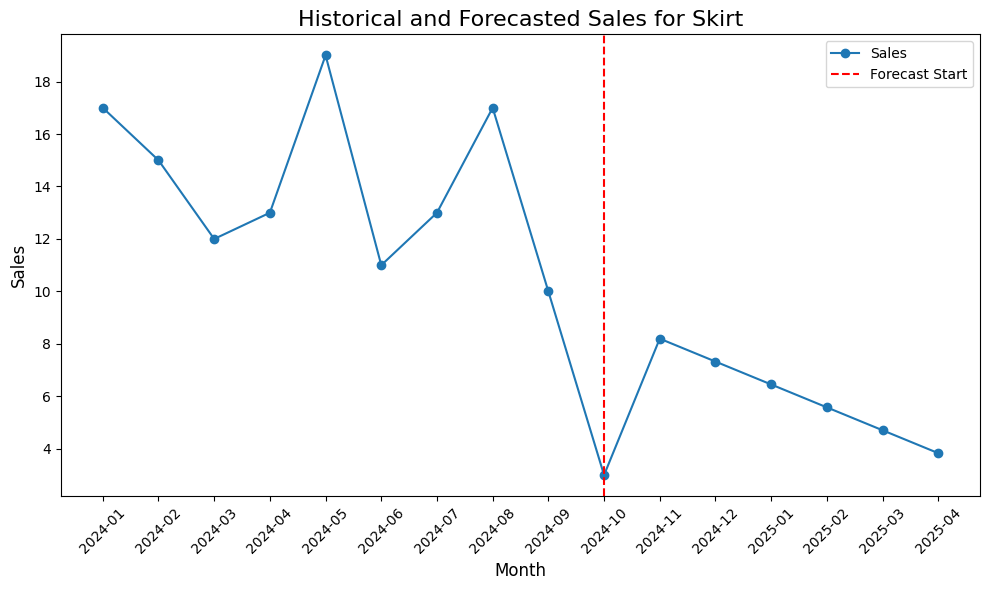

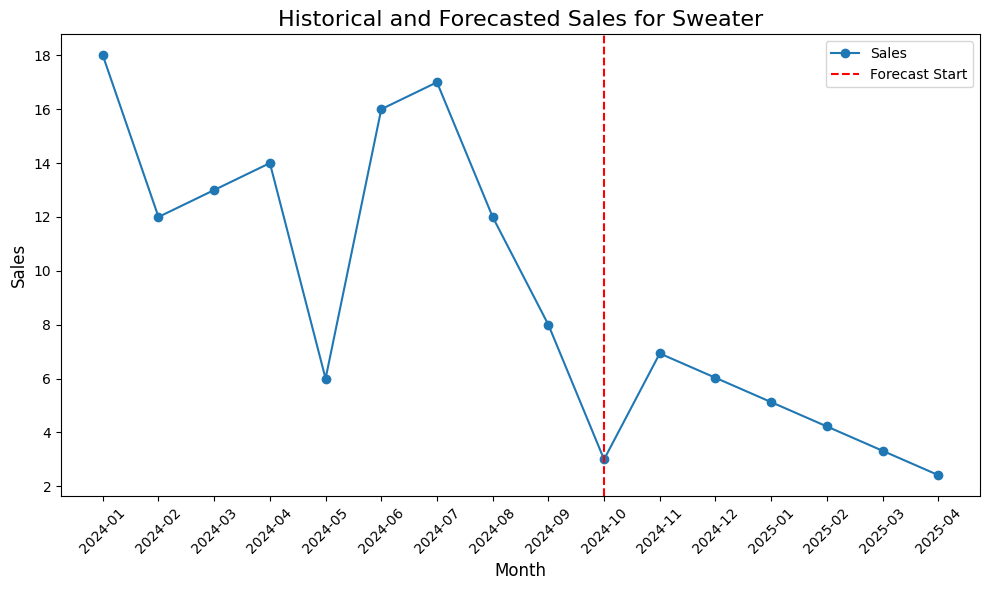

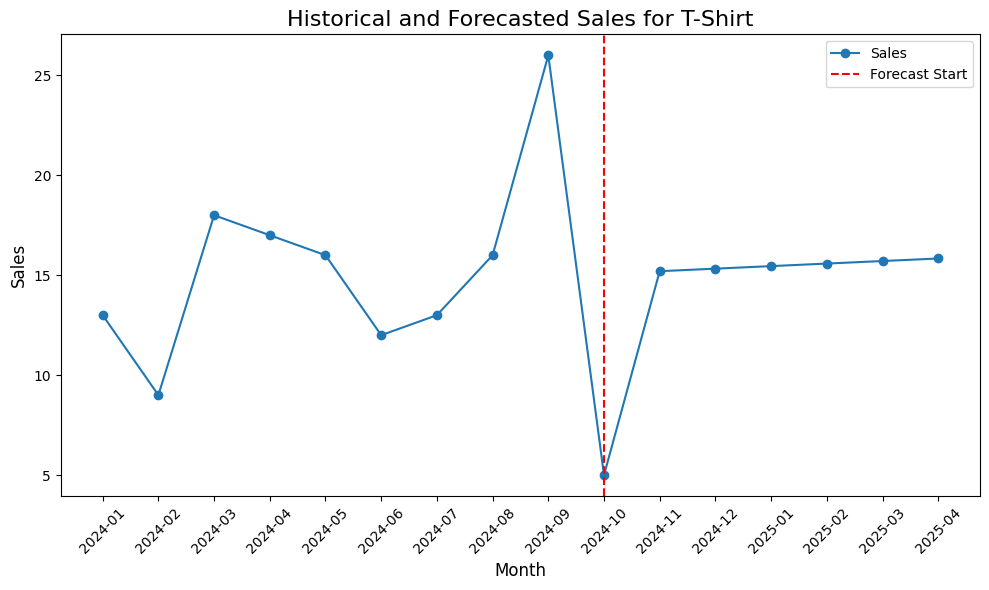

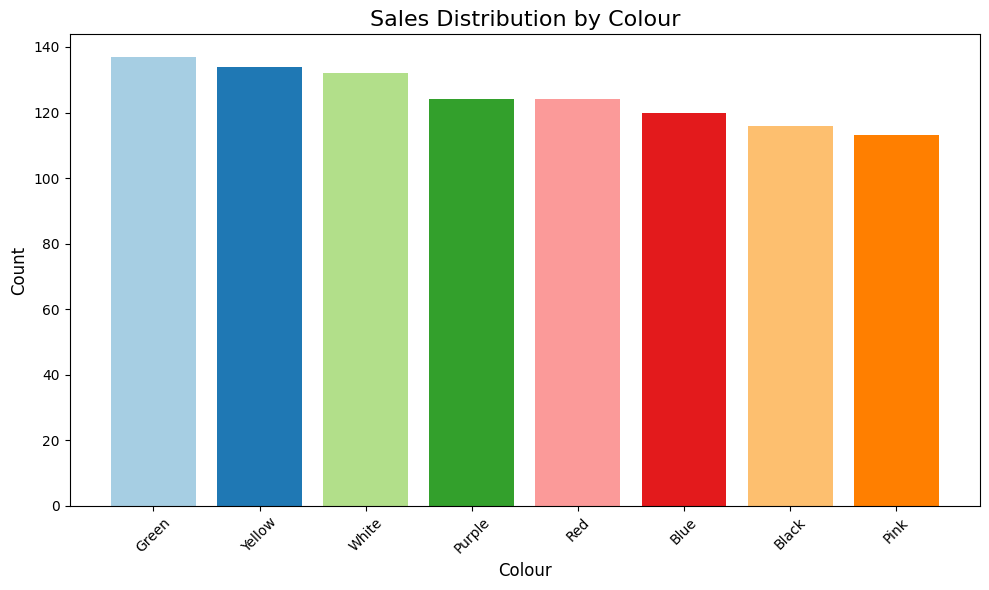

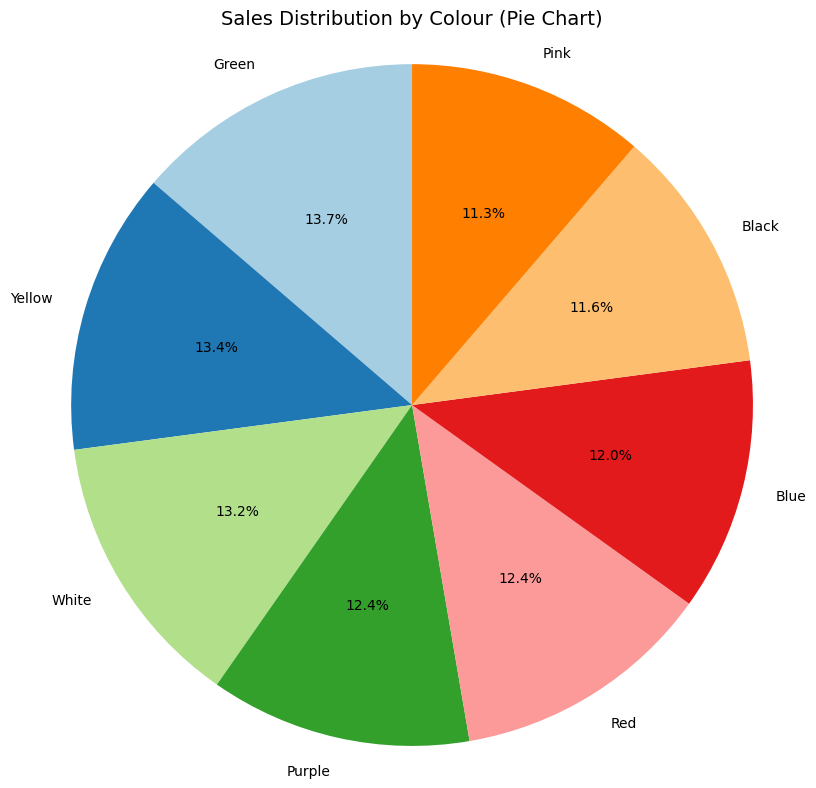

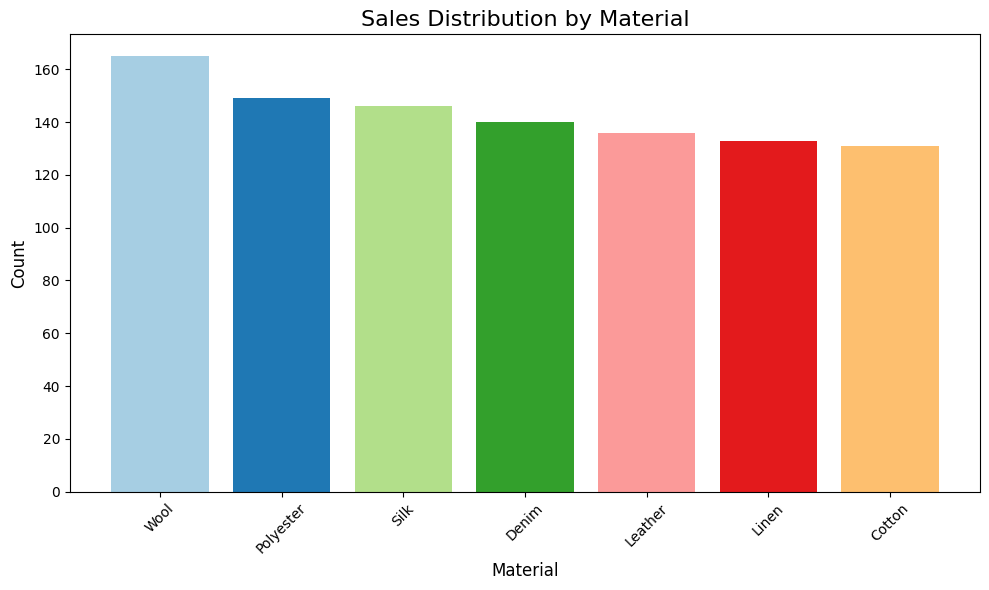

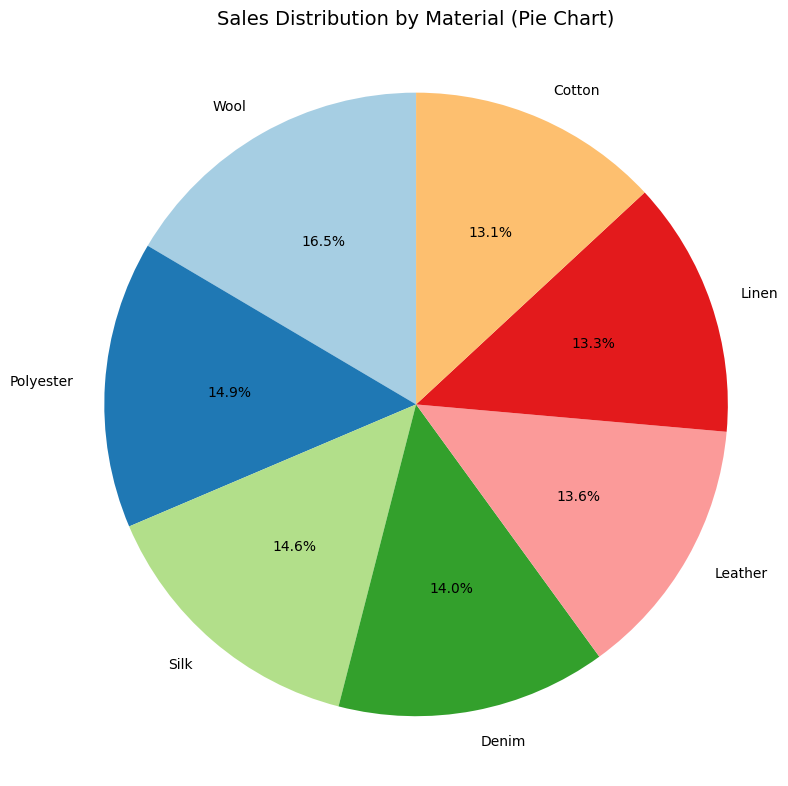

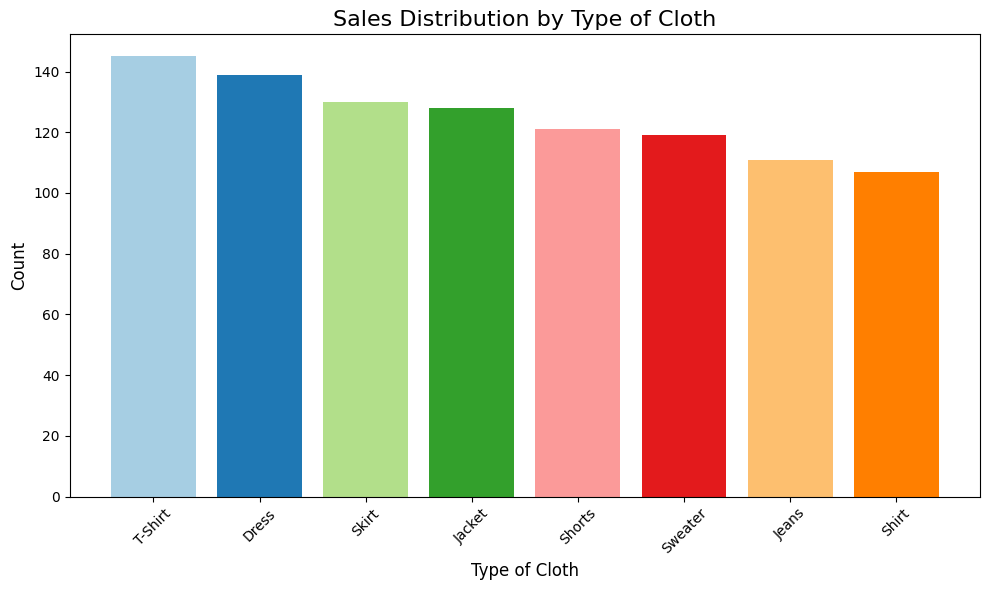

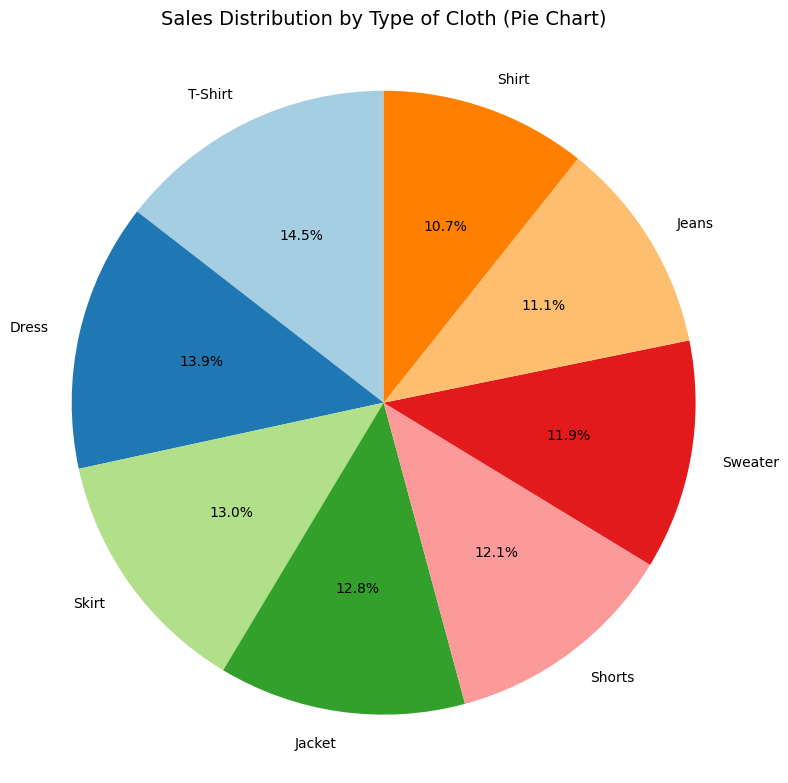

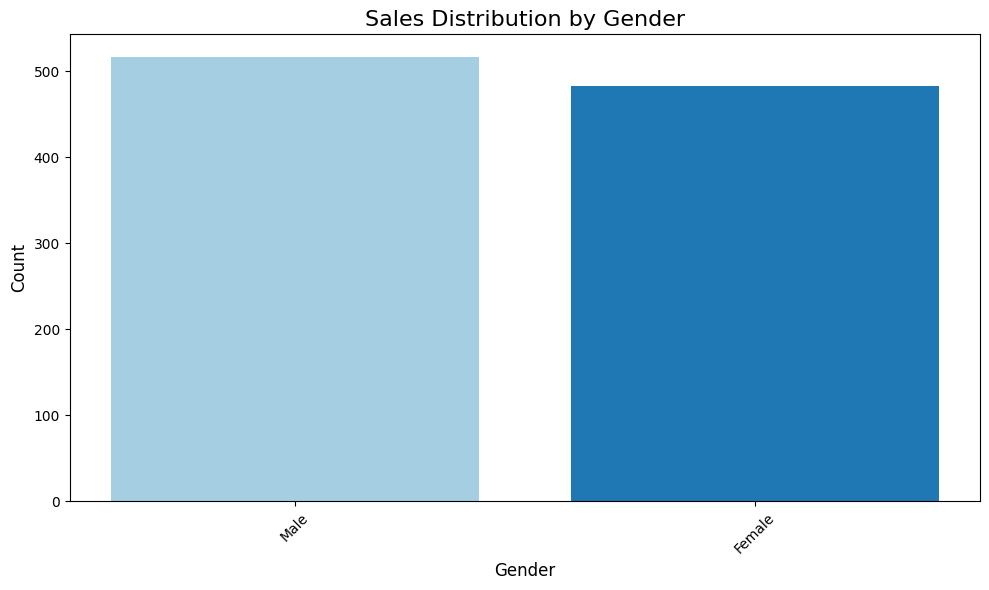

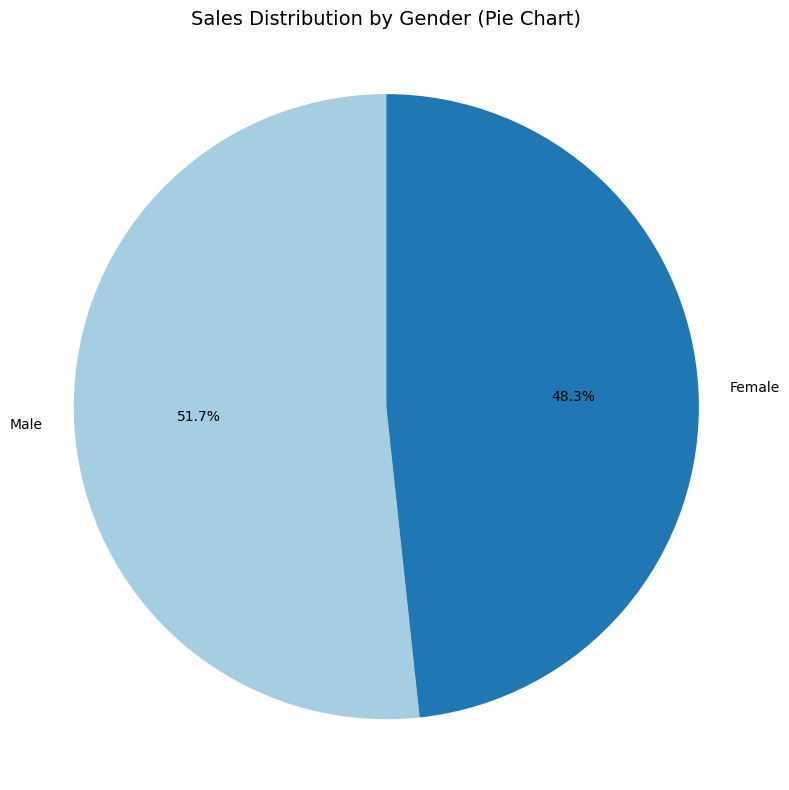

             Dress     Jacket      Jeans      Shirt     Shorts     Skirt  \
2024-11  13.600000  15.600000  11.333333  13.733333  12.000000  8.200000   
2024-12  13.545455  16.109091  11.375758  14.284848  11.981818  7.327273   
2025-01  13.490909  16.618182  11.418182  14.836364  11.963636  6.454545   
2025-02  13.436364  17.127273  11.460606  15.387879  11.945455  5.581818   
2025-03  13.381818  17.636364  11.503030  15.939394  11.927273  4.709091   
2025-04  13.327273  18.145455  11.545455  16.490909  11.909091  3.836364   

          Sweater    T-Shirt  
2024-11  6.933333  15.200000  
2024-12  6.030303  15.327273  
2025-01  5.127273  15.454545  
2025-02  4.224242  15.581818  
2025-03  3.321212  15.709091  
2025-04  2.418182  15.836364  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas.tseries.offsets import DateOffset

# Load the dataset
df = pd.read_csv('clothing_production_dataset_1000_rows.csv')

# Parse date and convert to datetime
df['Date of Purchasing'] = pd.to_datetime(df['Date of Purchasing'])

# Aggregate data: Group by Type of Cloth and Month (Resampling to monthly sales)
df['Month'] = df['Date of Purchasing'].dt.to_period('M')
sales_data = df.groupby(['Month', 'Type of Cloth Purchased']).size().unstack().fillna(0)

# Function to forecast sales using linear regression
def forecast_sales(data, steps=6):
    # Correct usage of pd.period_range to generate future periods
    future_dates = pd.period_range(start=data.index[-1] + 1, periods=steps, freq='M')

    # Apply Linear Regression to each type of cloth
    forecast_df = pd.DataFrame(index=future_dates)

    for cloth_type in data.columns:
        # Prepare data for regression
        X = np.arange(len(data)).reshape(-1, 1)  # Independent variable (time steps)
        y = data[cloth_type].values  # Dependent variable (sales)

        # Create and fit the model
        model = LinearRegression()
        model.fit(X, y)

        # Forecast future sales
        future_X = np.arange(len(data), len(data) + steps).reshape(-1, 1)
        forecast = model.predict(future_X)

        # Store forecast
        forecast_df[cloth_type] = forecast

    return forecast_df

# Forecast future sales for the next 6 months
forecasted_sales = forecast_sales(sales_data, steps=6)

# Combine historical and forecasted sales for visualization
combined_sales = pd.concat([sales_data, forecasted_sales])

# Visualization of Historical and Forecasted Sales
for cloth_type in sales_data.columns:
    plt.figure(figsize=(10, 6))
    # Corrected index formatting for period index
    plt.plot(combined_sales.index.strftime('%Y-%m'), combined_sales[cloth_type], label='Sales', marker='o')
    plt.axvline(x=sales_data.index[-1].strftime('%Y-%m'), color='red', linestyle='--', label='Forecast Start')
    plt.title(f'Historical and Forecasted Sales for {cloth_type}', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Sales Distribution for Colour, Material, Type of Cloth, and Gender

# Function to plot bar chart for categorical data
def plot_bar_chart(column_name, title, xlabel):
    counts = df[column_name].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(counts.index, counts.values, color=plt.cm.Paired.colors[:len(counts)])
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot pie chart for categorical data
def plot_pie_chart(column_name, title):
    counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors[:len(counts)])
    plt.title(title, fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures pie chart is drawn as a circle.
    plt.tight_layout()
    plt.show()

# 1. Analyzing and visualizing sales distribution by Colour
plot_bar_chart('Colour of the Cloth', 'Sales Distribution by Colour', 'Colour')
plot_pie_chart('Colour of the Cloth', 'Sales Distribution by Colour (Pie Chart)')

# 2. Analyzing and visualizing sales distribution by Material
plot_bar_chart('Material of the Cloth', 'Sales Distribution by Material', 'Material')
plot_pie_chart('Material of the Cloth', 'Sales Distribution by Material (Pie Chart)')

# 3. Analyzing and visualizing sales distribution by Type of Cloth Purchased
plot_bar_chart('Type of Cloth Purchased', 'Sales Distribution by Type of Cloth', 'Type of Cloth')
plot_pie_chart('Type of Cloth Purchased', 'Sales Distribution by Type of Cloth (Pie Chart)')

# 4. Analyzing and visualizing sales distribution by Gender
plot_bar_chart('Gender', 'Sales Distribution by Gender', 'Gender')
plot_pie_chart('Gender', 'Sales Distribution by Gender (Pie Chart)')

# Show forecasted sales data for future months
print(forecasted_sales)
Ex ku ethuku da extra feelings!!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')